Bean There Done That is a small-sized coffee roaster in the Netherlands, with an annual output of ±1,000 tonnes and <1% domestic market share. Despite offering premium specialty coffee, the company struggles to grow and needs to assess whether its operations and business model are ready to scale.  The challenge now is to evaluate whether current operations can sustainably handle renewed growth, and to identify bottlenecks in sourcing, production, and distribution. 

How can the company improve efficiency and scalability while maintaining premium quality, to grow in a highly competitive market? 

Roaster Utilization Rate (% of max capacity used) 
Shows if production capacity can handle more demand or if new investments are required. Production_kg / Max_possible_kg. 
Supplier Reliability (% on-time deliveries) 
Inventory Turnover (times stock is renewed yearly) 
On-Time Delivery Rate (% delivered as promised) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Bean there done that data(E-com sales orders by product).csv', sep=';', encoding='latin1', engine='python')
print(df.head())


        Product  Bag type  Quantity       Value  Order date Delivery date  \
0    Dark Roast         2        11    126,39   01-01-2023    02-01-2023   
1    Dark Roast         2         6     68,94   01-01-2023    02-01-2023   
2    Dark Roast         2         3     34,47   01-01-2023    02-01-2023   
3  Medium Roast         2        10    129,50   01-01-2023    02-01-2023   
4    Dark Roast         2         5     57,45   01-01-2023    02-01-2023   

  Delivery fee Shipping costs Ship to (province)  Unnamed: 9  
0        -            6,75        Zuid-Holland         NaN  
1        -            6,75          Overijssel         NaN  
2       4,95          6,75             Limburg         NaN  
3        -            6,75           Flevoland         NaN  
4        -            6,75           Friesland         NaN  


In [2]:
print(df.columns)
print(df.head())
print(df.info())


Index(['Product', 'Bag type', 'Quantity', 'Value', 'Order date',
       'Delivery date', 'Delivery fee', 'Shipping costs', 'Ship to (province)',
       'Unnamed: 9'],
      dtype='object')
        Product  Bag type  Quantity       Value  Order date Delivery date  \
0    Dark Roast         2        11    126,39   01-01-2023    02-01-2023   
1    Dark Roast         2         6     68,94   01-01-2023    02-01-2023   
2    Dark Roast         2         3     34,47   01-01-2023    02-01-2023   
3  Medium Roast         2        10    129,50   01-01-2023    02-01-2023   
4    Dark Roast         2         5     57,45   01-01-2023    02-01-2023   

  Delivery fee Shipping costs Ship to (province)  Unnamed: 9  
0        -            6,75        Zuid-Holland         NaN  
1        -            6,75          Overijssel         NaN  
2       4,95          6,75             Limburg         NaN  
3        -            6,75           Flevoland         NaN  
4        -            6,75     

In [3]:
import re

def clean_money(val):
    if isinstance(val, str):
        # Remove euro sign, spaces, and handle negatives or missing
        val = re.sub(r'[^\d,.-]', '', val)
        # Replace comma with dot for European decimals
        val = val.replace(',', '.')
        # Default empty or dash to zero
        if val in ['', '-', '.', ',']:
            return 0.0
        try:
            return float(val)
        except:
            return 0.0
    return val

df['Value'] = df['Value'].apply(clean_money)


In [4]:
df = df.drop(columns=['Unnamed: 9'])

print(df.isnull().sum())


Product               0
Bag type              0
Quantity              0
Value                 0
Order date            0
Delivery date         0
Delivery fee          0
Shipping costs        0
Ship to (province)    0
dtype: int64


In [5]:
df['Order date'] = pd.to_datetime(df['Order date'], format='%d-%m-%Y')
df['Delivery date'] = pd.to_datetime(df['Delivery date'], format='%d-%m-%Y')


In [6]:
df['Bag type'] = df['Bag type'].astype(str)


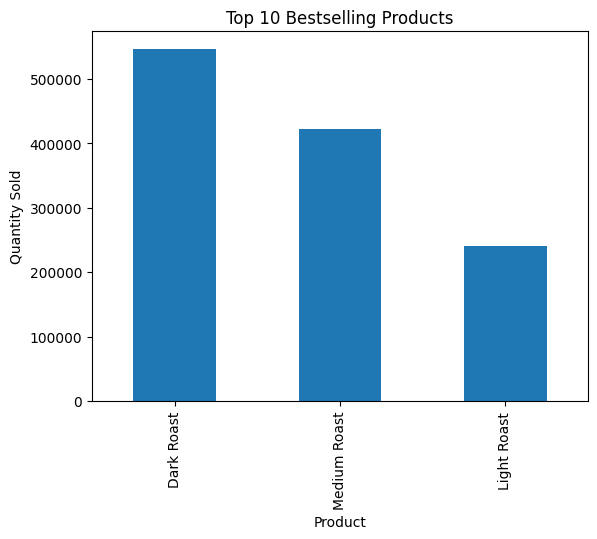

In [ ]:
df.groupby("Product")["Quantity"].sum().sort_values(ascending=False).head(10).plot(kind="bar", title="Top Bestselling Products")
plt.ylabel("Quantity Sold")
plt.show()


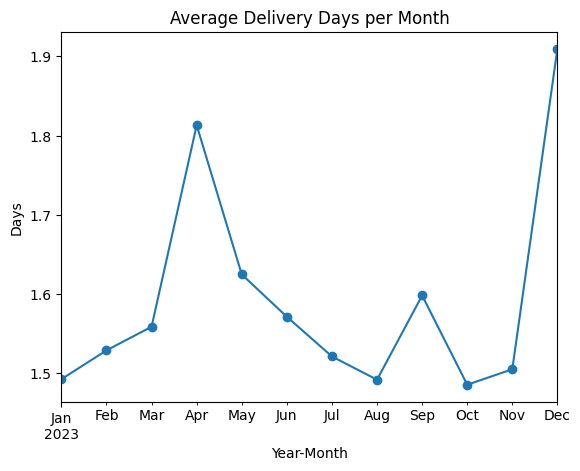

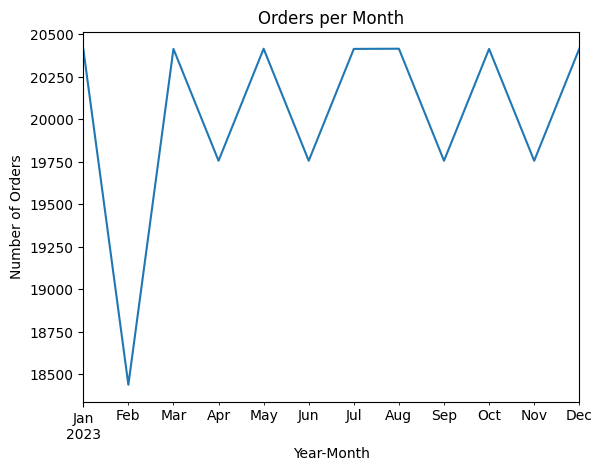

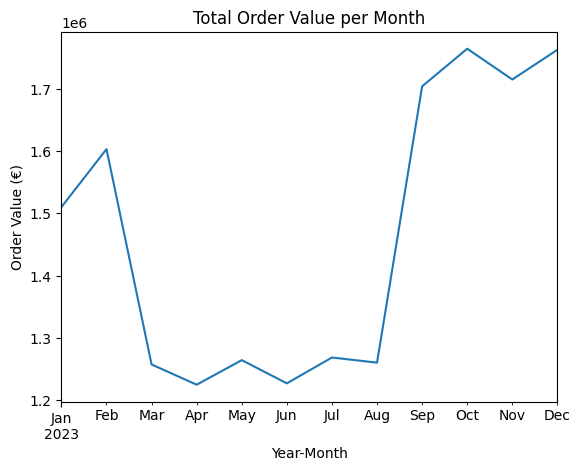

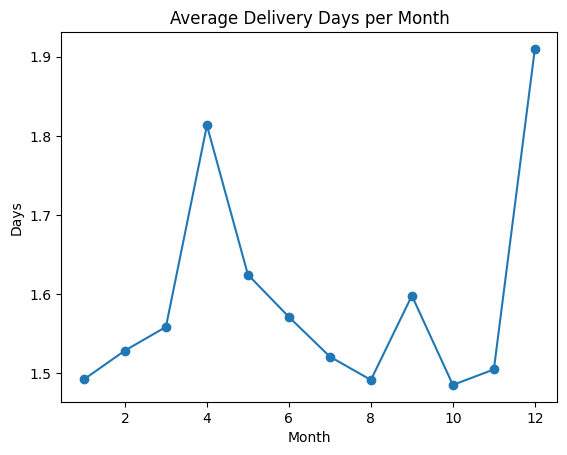

In [8]:
df['Month'] = df['Order date'].dt.month
df['Year'] = df['Order date'].dt.year
df['YearMonth'] = df['Order date'].dt.to_period('M')

df['Delivery_days'] = (df['Delivery date'] - df['Order date']).dt.days

avg_delivery_days = df.groupby('YearMonth')['Delivery_days'].mean()
avg_delivery_days.plot(kind="line", marker="o", title="Average Delivery Days per Month")
plt.ylabel("Days")
plt.xlabel("Year-Month")
plt.show()


orders_per_month = df.groupby('YearMonth').size()
orders_per_month.plot()
plt.title('Orders per Month')
plt.xlabel('Year-Month')
plt.ylabel('Number of Orders')
plt.show()

value_per_month = df.groupby('YearMonth')['Value'].sum()
value_per_month.plot()
plt.title('Total Order Value per Month')
plt.xlabel('Year-Month')
plt.ylabel('Order Value (€)')
plt.show()


df.groupby("Month")["Delivery_days"].mean().plot(kind="line", marker="o", title="Average Delivery Days per Month")
plt.ylabel("Days")
plt.show()


           Product Bag type       Quantity          Value  \
count       240352   240352  240352.000000  240352.000000   
unique           3        2            NaN            NaN   
top     Dark Roast        2            NaN            NaN   
freq        108370   168143            NaN            NaN   
mean           NaN      NaN       5.027922      73.064588   
min            NaN      NaN       1.000000      22.980000   
25%            NaN      NaN       3.000000      45.960000   
50%            NaN      NaN       4.000000      68.940000   
75%            NaN      NaN       7.000000      92.750000   
max            NaN      NaN      12.000000     159.000000   
std            NaN      NaN       2.813451      35.502164   

                           Order date                  Delivery date  \
count                          240352                         240352   
unique                            NaN                            NaN   
top                               NaN              

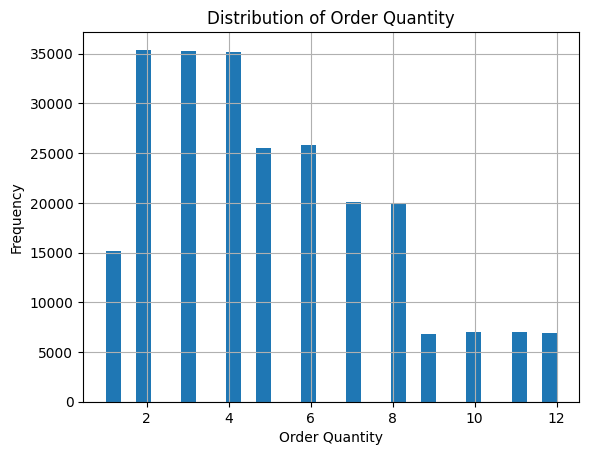

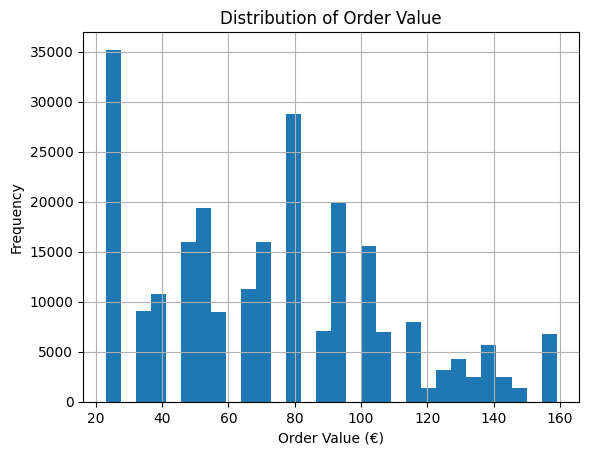

In [9]:
print(df.describe(include='all'))  # Quick summary for all columns
df['Quantity'].hist(bins=30)
plt.xlabel('Order Quantity')
plt.ylabel('Frequency')
plt.title('Distribution of Order Quantity')
plt.show()

df['Value'].hist(bins=30)
plt.xlabel('Order Value (€)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Value')
plt.show()


C:\Users\tweakers\AppData\Local\Temp\ipykernel_10568\3540372526.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  orders_per_month = df.groupby(pd.Grouper(key='Order date', freq='M'))['Product'].count()


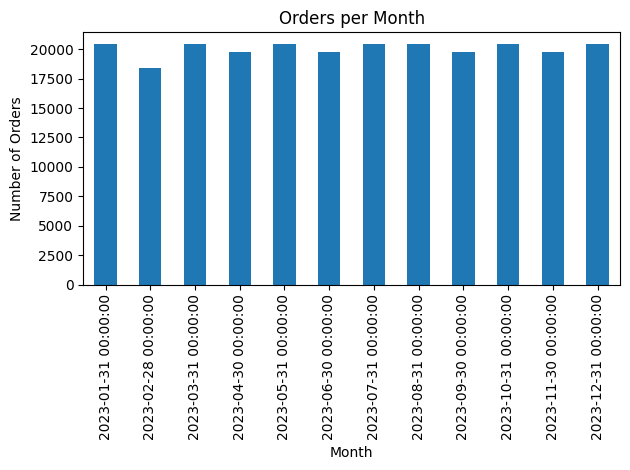

In [10]:

orders_per_month = df.groupby(pd.Grouper(key='Order date', freq='M'))['Product'].count()
orders_per_month.plot(kind='bar')
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()




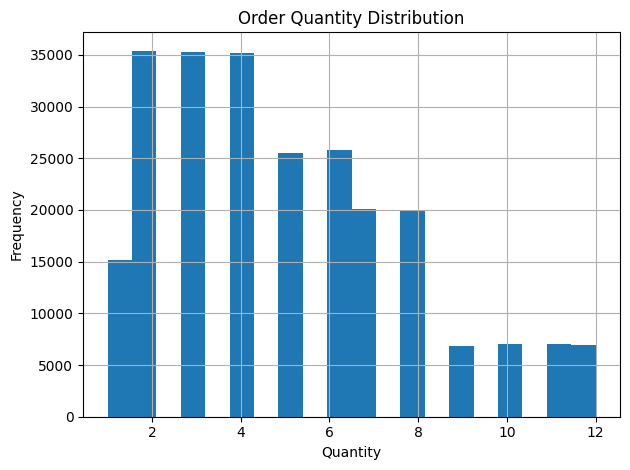

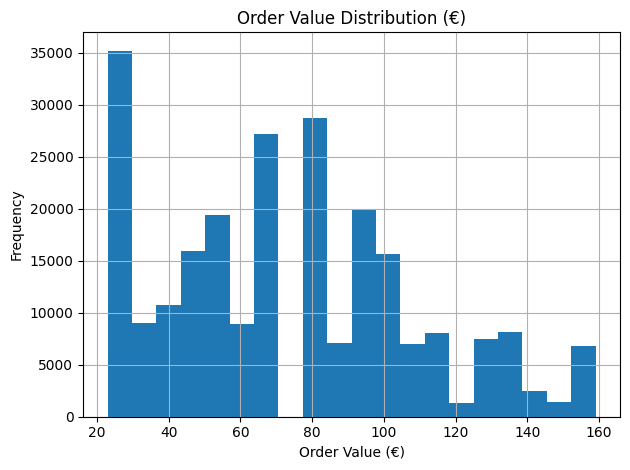

In [11]:
df['Quantity'].hist(bins=20)
plt.title('Order Quantity Distribution')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

df['Value'].hist(bins=20)
plt.title('Order Value Distribution (€)')
plt.xlabel('Order Value (€)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [77]:
%pip install geopandas
%pip install matplotlib  



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf = gpd.read_file('geoBoundaries-NLD-ADM1.geojson')
print(gdf.columns)  # Check column names for province names
print(gdf['shapeName'].head())  # Usually 'shapeName' contains province names in geoBoundaries


Index(['shapeName', 'shapeISO', 'shapeID', 'shapeGroup', 'shapeType',
       'geometry'],
      dtype='object')
0     Groningen
1       Drenthe
2       Utrecht
3     Flevoland
4    Overijssel
Name: shapeName, dtype: object


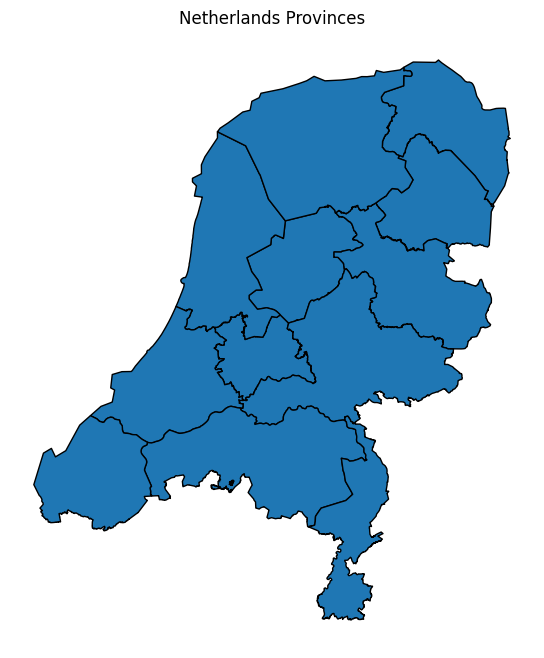

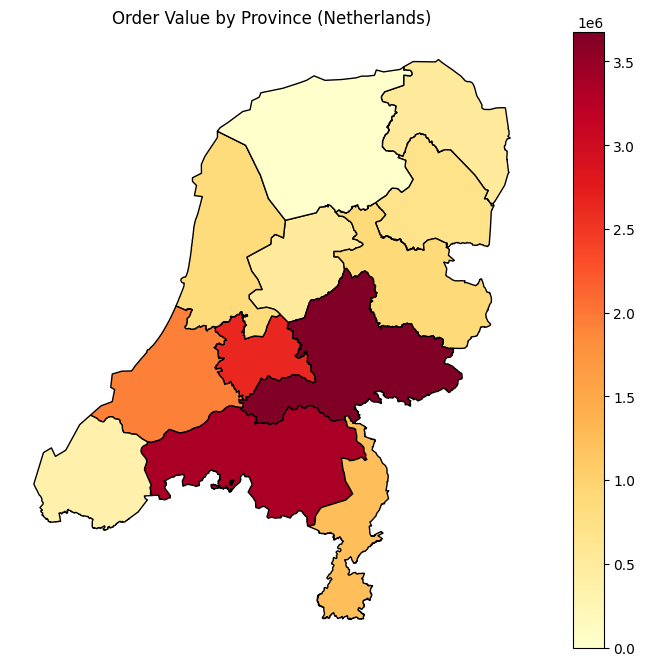

In [14]:
import matplotlib.pyplot as plt

gdf.plot(edgecolor='black', figsize=(10,8))
plt.title('Netherlands Provinces')
plt.axis('off')
plt.show()

order_value_province = df.groupby('Ship to (province)')['Value'].sum().reset_index()
order_value_province.columns = ['province', 'order_value']

gdf = gdf.merge(order_value_province, left_on='shapeName', right_on='province', how='left')
gdf['order_value'] = gdf['order_value'].fillna(0)

gdf.plot(column='order_value', cmap='YlOrRd', legend=True, edgecolor='black', figsize=(10,8))
plt.title('Order Value by Province (Netherlands)')
plt.axis('off')
plt.show()


In [29]:
# Define working parameters
hours_per_day = 8
days_per_week = 5
weeks_per_month = 4
days_per_month = days_per_week * weeks_per_month  # Typically 20 working days/month

# Probat P60
p60_capacity_hour = 215    # kg/hour
p60_capacity_month = p60_capacity_hour * hours_per_day * days_per_month

# Probat Px120
px120_capacity_hour = 480  # kg/hour
px120_capacity_month = px120_capacity_hour * hours_per_day * days_per_month

# Total max monthly capacity (kg)
total_max_monthly_capacity = p60_capacity_month + px120_capacity_month

print("Probat P60 max/month:", p60_capacity_month, "kg")
print("Probat Px120 max/month:", px120_capacity_month, "kg")
print("TOTAL max/month:", total_max_monthly_capacity, "kg")


Probat P60 max/month: 34400 kg
Probat Px120 max/month: 76800 kg
TOTAL max/month: 111200 kg


In [53]:
df['Bag type'] = df['Bag type'].astype(int)
def bag_weight_kg(bagtype):
    if bagtype == 2:
        return 0.5
    elif bagtype == 1:
        return 1.0
    else:
        return None

df['Bag_kg'] = df['Bag type'].apply(bag_weight_kg)
df['Total_kg'] = df['Quantity'] * df['Bag_kg']
print(df[['Product', 'Bag type', 'Quantity', 'Bag_kg', 'Total_kg']].head(20))


         Product  Bag type  Quantity  Bag_kg  Total_kg
0     Dark Roast         2        11     0.5       5.5
1     Dark Roast         2         6     0.5       3.0
2     Dark Roast         2         3     0.5       1.5
3   Medium Roast         2        10     0.5       5.0
4     Dark Roast         2         5     0.5       2.5
5   Medium Roast         1         5     1.0       5.0
6   Medium Roast         2        12     0.5       6.0
7   Medium Roast         2         7     0.5       3.5
8   Medium Roast         1         1     1.0       1.0
9     Dark Roast         2        12     0.5       6.0
10    Dark Roast         1         3     1.0       3.0
11  Medium Roast         2         8     0.5       4.0
12   Light Roast         2         5     0.5       2.5
13  Medium Roast         1         1     1.0       1.0
14    Dark Roast         1         2     1.0       2.0
15  Medium Roast         2         6     0.5       3.0
16    Dark Roast         1         1     1.0       1.0
17    Dark

In [54]:
df['Month'] = pd.to_datetime(df['Order date'], dayfirst=True).dt.to_period('M')

In [55]:
kg_per_month = df.groupby('Month')['Total_kg'].sum()
print(kg_per_month)


Month
2023-01    61158.0
2023-02    64905.5
2023-03    50865.0
2023-04    49566.0
2023-05    51148.5
2023-06    49654.5
2023-07    51298.0
2023-08    51034.0
2023-09    69031.0
2023-10    71511.5
2023-11    69418.0
2023-12    71397.5
Freq: M, Name: Total_kg, dtype: float64


In [56]:
utilization_rate = (kg_per_month / 111200) * 100
print(utilization_rate)


Month
2023-01    54.998201
2023-02    58.368255
2023-03    45.741906
2023-04    44.573741
2023-05    45.996853
2023-06    44.653327
2023-07    46.131295
2023-08    45.893885
2023-09    62.078237
2023-10    64.308903
2023-11    62.426259
2023-12    64.206385
Freq: M, Name: Total_kg, dtype: float64


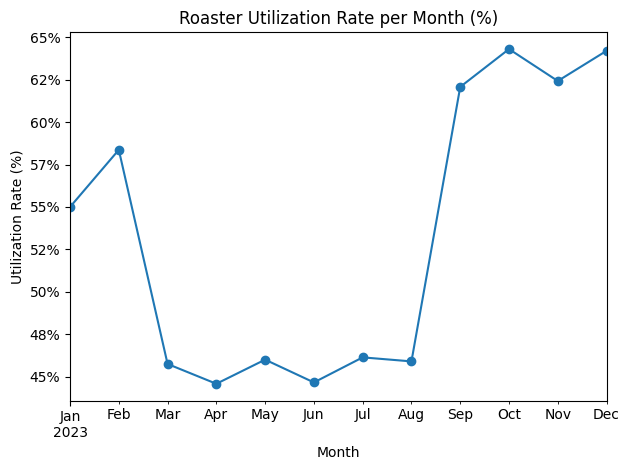

In [57]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

ax = utilization_rate.plot(marker='o')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
plt.title('Roaster Utilization Rate per Month (%)')
plt.ylabel('Utilization Rate (%)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [59]:
monthly_sold = df.groupby('Month')['Total_kg'].sum()

In [60]:
avg_inventory = monthly_sold.rolling(window=2).mean()  # Average of current & previous month
# For first month(s), this will be NaN, which is fine for real data


In [61]:
inventory_turnover = monthly_sold / avg_inventory


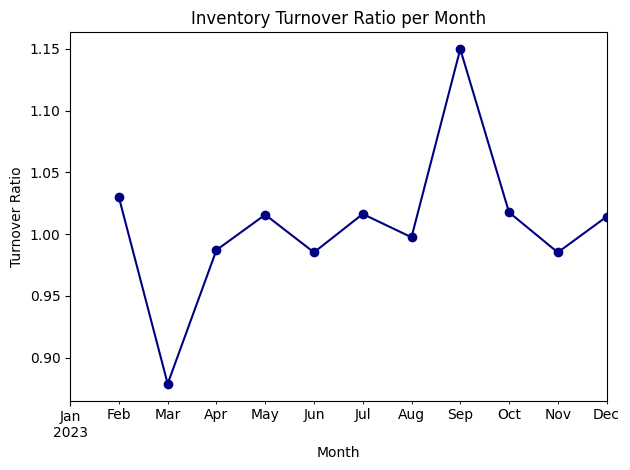

In [62]:
import matplotlib.pyplot as plt

ax = inventory_turnover.plot(marker='o', color='navy')
plt.title('Inventory Turnover Ratio per Month')
plt.ylabel('Turnover Ratio')
plt.xlabel('Month')
plt.tight_layout()
plt.show()


In [63]:
df['Order date'] = pd.to_datetime(df['Order date'], dayfirst=True)
df['Delivery date'] = pd.to_datetime(df['Delivery date'], dayfirst=True)

In [64]:
df['delivery_days'] = (df['Delivery date'] - df['Order date']).dt.days


In [65]:
df['on_time'] = df['delivery_days'] <= 1


In [66]:
df['on_time'] = df['delivery_days'] <= 1


In [67]:
df['Month'] = df['Order date'].dt.to_period('M')
on_time_rate = df.groupby('Month')['on_time'].mean() * 100  # percentage


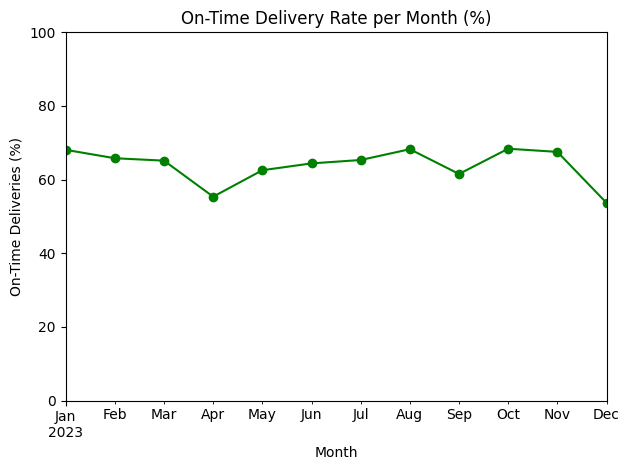

In [68]:
import matplotlib.pyplot as plt

ax = on_time_rate.plot(marker='o', color='green')
plt.title('On-Time Delivery Rate per Month (%)')
plt.ylabel('On-Time Deliveries (%)')
plt.xlabel('Month')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()


In [70]:
import re

def clean_euro(value):
    # Remove common currency/space/Unicode, replace comma with dot, replace '-' and blanks with 0
    if pd.isna(value):
        return 0.0
    if isinstance(value, str):
        # Remove euro and whitespace, handle various dash-like entries
        v = re.sub(r'[€\s\x80]', '', value)
        v = v.replace(',', '.')
        if v in ['', '-', 'NaN', None]:
            return 0.0
        try:
            return float(v)
        except:
            return 0.0
    else:
        return float(value)

df['Value'] = df['Value'].apply(clean_euro)
df['Delivery fee'] = df['Delivery fee'].apply(clean_euro)
df['Shipping costs'] = df['Shipping costs'].apply(clean_euro)


In [71]:
print(df[['Value', 'Delivery fee', 'Shipping costs']].head(20))


     Value  Delivery fee  Shipping costs
0   126.39          0.00            6.75
1    68.94          0.00            6.75
2    34.47          4.95            6.75
3   129.50          0.00            6.75
4    57.45          0.00            6.75
5   129.50          0.00            6.75
6   155.40          0.00            6.75
7    90.65          0.00            6.75
8    25.90          4.95            6.75
9   137.88          0.00            6.75
10   68.94          4.95            6.75
11  103.60          0.00            6.75
12   66.25          0.00            6.75
13   25.90          4.95            6.75
14   45.96          4.95            6.75
15   77.70          0.00            6.75
16   22.98          4.95            6.75
17   34.47          4.95            6.75
18   45.96          4.95            6.75
19   34.47          4.95            6.75


In [72]:
bag_cost = {0.5: 3.0, 1.0: 5.0}
df['product_cost'] = df['Bag_kg'].map(bag_cost) * df['Quantity']


In [73]:
df['total_cost'] = df['product_cost'] + df['Delivery fee'] + df['Shipping costs']


In [74]:
df['gross_margin'] = df['Value'] - df['total_cost']
df['gross_margin_pct'] = (df['gross_margin'] / df['Value']) * 100


In [75]:
df['Month'] = pd.to_datetime(df['Order date'], dayfirst=True).dt.to_period('M')
monthly_gross_margin_pct = df.groupby('Month')['gross_margin_pct'].mean()


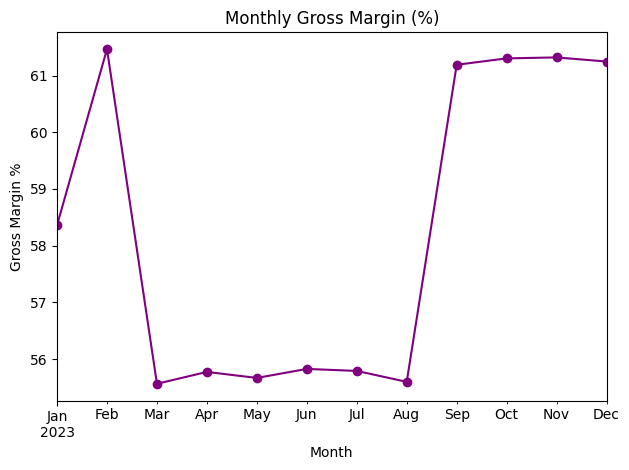

In [76]:
import matplotlib.pyplot as plt

ax = monthly_gross_margin_pct.plot(marker='o', color='purple')
plt.title('Monthly Gross Margin (%)')
plt.ylabel('Gross Margin %')
plt.xlabel('Month')
plt.tight_layout()
plt.show()
